<a href="https://colab.research.google.com/github/glebmikha/ab-testing-course/blob/main/03_ab_testing_course_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data upload

In [1]:
import pandas as pd

https://drive.google.com/file/d/1QqWhauAgV8PQV-bLNyHnDjVV2sLFq9UA/view?usp=sharing

In [2]:
! gdown 1QqWhauAgV8PQV-bLNyHnDjVV2sLFq9UA

Downloading...
From: https://drive.google.com/uc?id=1QqWhauAgV8PQV-bLNyHnDjVV2sLFq9UA
To: /content/covid.csv
100% 60.0k/60.0k [00:00<00:00, 86.0MB/s]


In [3]:
df = pd.read_csv('/content/covid.csv')

In [4]:
len(df)

10000

In [5]:
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,0
2,1,0,1
3,0,1,0
4,1,0,1


# Error rate

In [6]:
len(df[df['y_true'] != df['y_pred1']])

1800

In [7]:
len(df)

10000

In [8]:
len(df[df['y_true'] != df['y_pred1']]) / len(df)

0.18

In [9]:
(df['y_true'] != df['y_pred1']).mean()

0.18

In [10]:
(df['y_true'] != df['y_pred1']).sum()

1800

In [11]:
(df['y_true'] != df['y_pred1']).count()

10000

In [12]:
(df['y_true'] != df['y_pred1']).sum() / (df['y_true'] != df['y_pred1']).count()

0.18

In [13]:
(df['y_true'] != df['y_pred1']).mean()

0.18

In [14]:
(df['y_true'] != df['y_pred2']).mean()

0.18

# Accuracy

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(df['y_true'],df['y_pred1'])

0.82

In [17]:
accuracy_score(df['y_true'],df['y_pred2'])

0.82

# Positive and Negative

In [18]:
positives = df[df['y_true'] == 1].copy()

In [19]:
negatives = df[df['y_true'] == 0].copy()

## FNR

In [20]:
(positives['y_true'] != positives['y_pred1']).mean()

0.2949852507374631

In [21]:
(positives['y_true'] != positives['y_pred2']).mean()

0.344149459193707

## FPR

In [22]:
(negatives['y_true'] != negatives['y_pred1']).mean()

0.061037639877924724

In [23]:
(negatives['y_true'] != negatives['y_pred2']).mean()

0.01017293997965412

## Sensitivity

In [24]:
accuracy_score(positives['y_true'],positives['y_pred1'])

0.7050147492625368

In [25]:
accuracy_score(positives['y_true'],positives['y_pred2'])

0.655850540806293

## Specificity

In [26]:
accuracy_score(negatives['y_true'],negatives['y_pred1'])

0.9389623601220752

In [27]:
accuracy_score(negatives['y_true'],negatives['y_pred2'])

0.9898270600203459

# Sensitivity and Specificity as functions

In [28]:
from sklearn.metrics import recall_score

In [29]:
recall_score(df['y_true'],df['y_pred1'])

0.7050147492625368

In [30]:
recall_score(df['y_true'],df['y_pred2'])

0.655850540806293

In [31]:
recall_score(df['y_true'],df['y_pred1'],pos_label=0)

0.9389623601220752

In [32]:
recall_score(df['y_true'],df['y_pred2'],pos_label=0)

0.9898270600203459

# Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

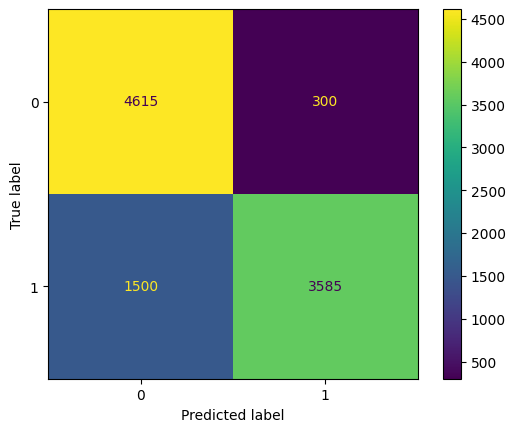

In [36]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

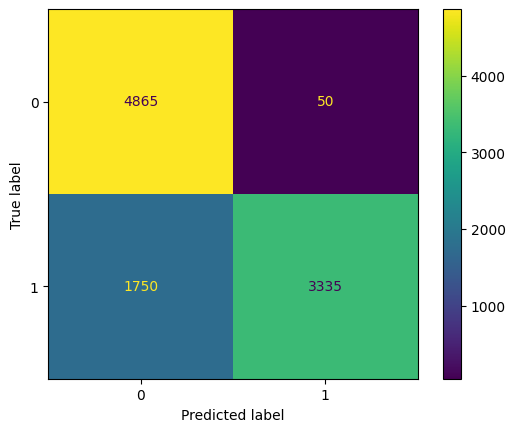

In [37]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [38]:
confusion_matrix(df['y_true'], df['y_pred2'])

array([[4865,   50],
       [1750, 3335]])

In [39]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred2']).ravel()

In [40]:
tn, fp, fn, tp

(4865, 50, 1750, 3335)

In [41]:
tp / (tp + fn)

0.655850540806293